# Day 2: 4th order solvers vs. 2nd order

Since we've worked so hard do make our solver, let's never have to do it again, by using it as an external function.  For this we'll use the ```hermite_library``` you can download from the day 4 webpage.

Let's import our usual things:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's also use the same parameter's we've used before:

In [2]:
# in solar masses
M1 = 0.0009 # Jupiter
M2 = 1.0 # sun

# initial parameters
rp = 1.0 # in AU 
vp = 35.0 # in km/s


Format the initial conditions, note we are *not* rescaling these:

In [3]:
# initial conditions - in 2D
r_0 = np.array([[rp, 0], [0, 0]])
v_0 = np.array([[0, vp], [0, 0]])

Start with our defaults for time:

In [4]:
delta_t = 1e5
n_steps = 5000

Now let's import some functions from the hermite library!  Remember: this library has to be in the same directory as this current .ipynb file.

In [5]:
from hermite_library import do_euler_2body

Just like with matplotlib.pyplot or numpy we can now use this function to calculate 2-body orbits using the euler method we developed yesterday.  We output our variables as:
1. radius is output in AU
1. velocity is in km/s
1. time is in seconds
1. energy is normalized to its initial condition

In [6]:
r_eu, v_eu, t_eu, E_eu = do_euler_2body(M1, M2, r_0, v_0, n_steps, delta_t)

Now let's plot just to remind ourselves what we are doing:

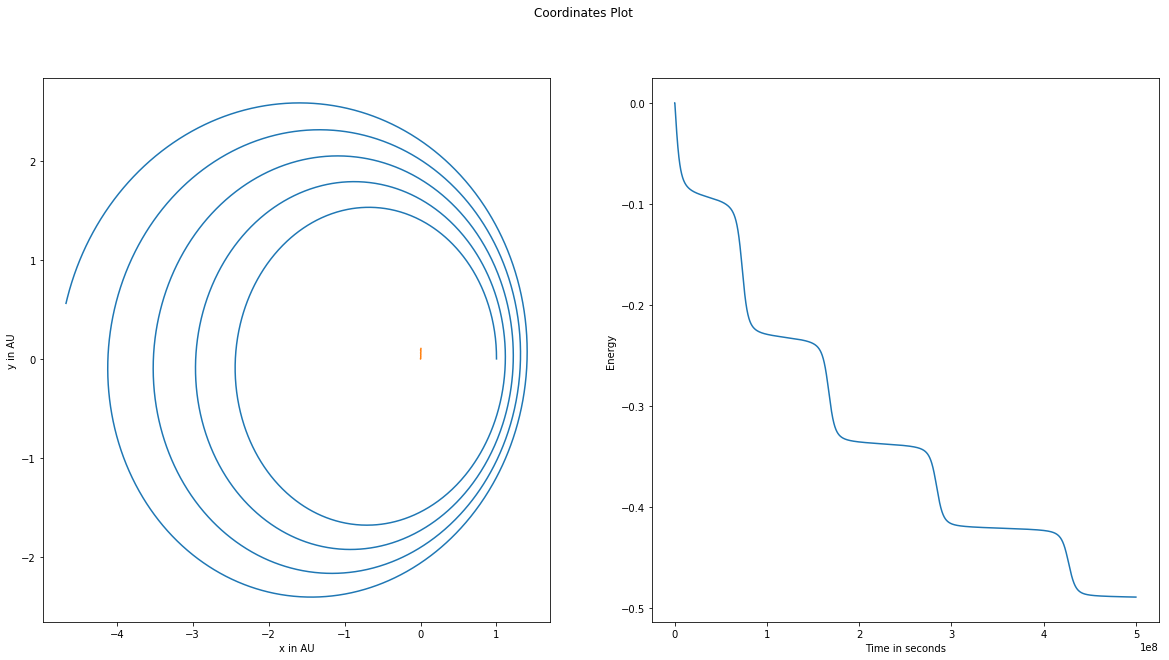

In [7]:
# let's plot!
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

# plot Euler's solution, particle 1
ax[0].plot(r_eu[:,0,0], r_eu[:,0,1])

# particle 2
ax[0].plot(r_eu[:,1,0], r_eu[:,1,1])

ax[1].plot(t_eu, E_eu)
ax[1].set_xlabel('Time in seconds')
ax[1].set_ylabel('Energy')

plt.show()

If we wanna be fancy - automatically calculate how many steps we wanna use:

In [8]:
# let's try to estimate how many steps we might need
from hermite_library import G
# we can estimate a ~ initial distance 
a = np.sqrt( ((r_0[0,:]-r_0[1,:])**2).sum() )

Porb = np.sqrt( 4.0*np.pi**2.0*a**3.0/(G*(M1+M2)) )
delta_t_new = Porb*0.0001 # change in time is fractions of orbit

n_steps_new = int(np.round(Porb/delta_t))*10 # *10 means 10 orbits

delta_t_new, n_steps_new

(2.431036181545659, 0)

We can also plot in years if we wanna:

In [9]:
t_euk_new = np.array(t_eu)/(365*24*60*60.) # into years

## Hermite solver - 4th order
We can compare our results with a 4th order solver.  Let's start by importing this function:

In [10]:
from hermite_library import do_hermite

The calling sequence for this will be a little different.  We will assume that we have a central star (in $M_\odot$, or solar masses) and then an array of planet masses in Jupiter masses ($M_J$).  

Though we'll input 3D positions and velocities, we'll only populate the x & y coordinates... for now...

In [11]:
star_mass = 1.0 # stellar mass in Msun
planet_masses = np.array( [1.0] ) # planet masses in Mjupiter

# [x,y,z] coords for each planet in AU
# NOTE: no z-coords!  These will be set to zero later on 
#   if you make them non-zero
planet_initial_position = np.array([ [rp, 0.0, 0.0] ])

# planet's velocity at each position in km/s
# NOTE: no z-velocities!  These will be set to zero later on 
#   if you make them non-zero
planet_initial_velocity = np.array([ [0.0, vp, 0.0] ])

# note: this assumes that the star is at (0, 0, 0) and has zero 
#  initial velocity

In [12]:
# calculate!

# h is for hermite!
r_h, v_h, t_h, e_h = do_hermite(star_mass, 
                                planet_masses, 
                                planet_initial_position, 
                                planet_initial_velocity, 
                                tfinal=delta_t*n_steps, Nsteps=n_steps)

# NOTE: here tfinal is (delta_t) X #steps from the Euler runs
#t_h = t_h/(365.*24*60*60)

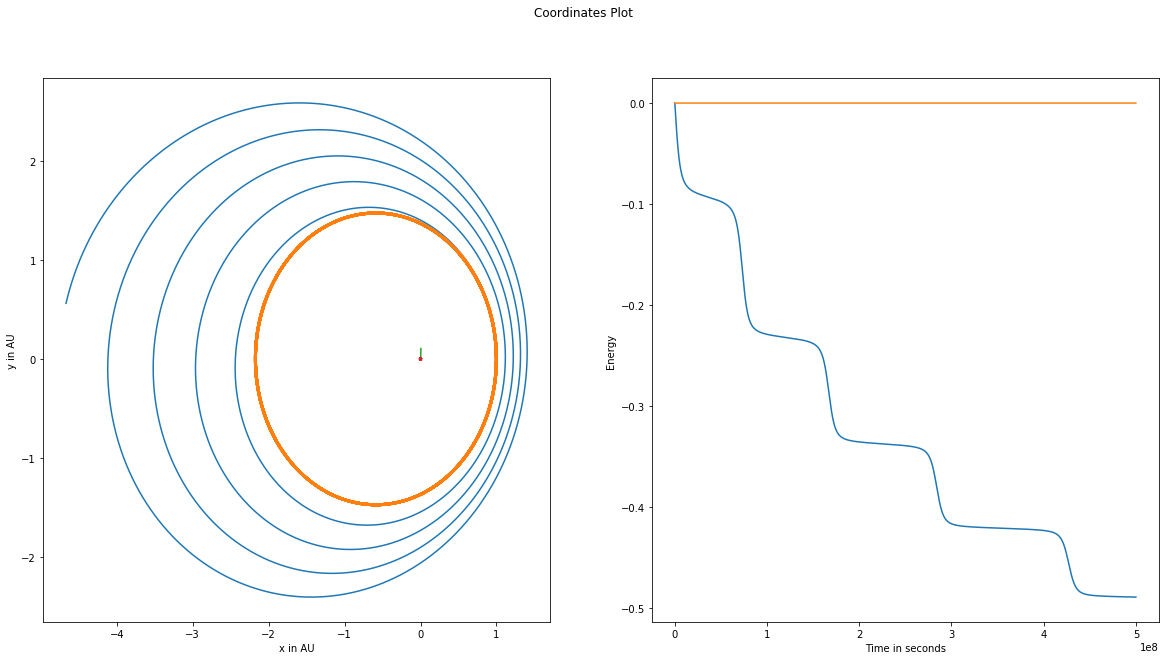

In [13]:
# let's plot!
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

# plot Euler's solution, particle 1
ax[0].plot(r_eu[:,0,0], r_eu[:,0,1])
# plot Hermite solution, with line width = 3
# NOTE: the indexing is a little different here!
ax[0].plot(r_h[0,0,:], r_h[0,1,:], lw=3)

# particle 2
ax[0].plot(r_eu[:,1,0], r_eu[:,1,1])
ax[0].plot(r_h[1,0,:], r_h[1,1,:], lw=3)

ax[1].plot(t_eu, E_eu)
ax[1].set_xlabel('Time in seconds')
ax[1].set_ylabel('Energy')
# re-norm energy
ax[1].plot(t_h, e_h)

plt.show()

So we can see that over the same time period the energy doesn't change!

### Exercise
Try this comparison with other masses.

Bonus: add in an angular momentum calculation to the library and plot this as an analysis plot